# Titanic: Machine Learning from Disaster

## I - Exploratory Data Analysis

In [1]:
# import libraries we will use
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

# seaborn for plotting
import seaborn as sns

# pandas for dataframes
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# numpy for linear algebra
import numpy as np

# sklearn for svm algorithm
from sklearn import svm
from sklearn.svm import SVC

In [2]:
# load training set into a pandas dataframe
data = pd.read_csv('./train.csv')
# load testing set 
test_data = pd.read_csv('./test.csv')

In [3]:
# Show head of datafram
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
#show head of testing data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# training data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
# statistical view of the numeric columns in training set
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# replace null fields in age column with mean age value for train and test
data.Age.fillna(data.Age.mean(), inplace=True)
test_data.Age.fillna(test_data.Age.mean(), inplace=True)

In [8]:
# check count to verify nulls have been replaced
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Use different plots to visaualize the data distribution

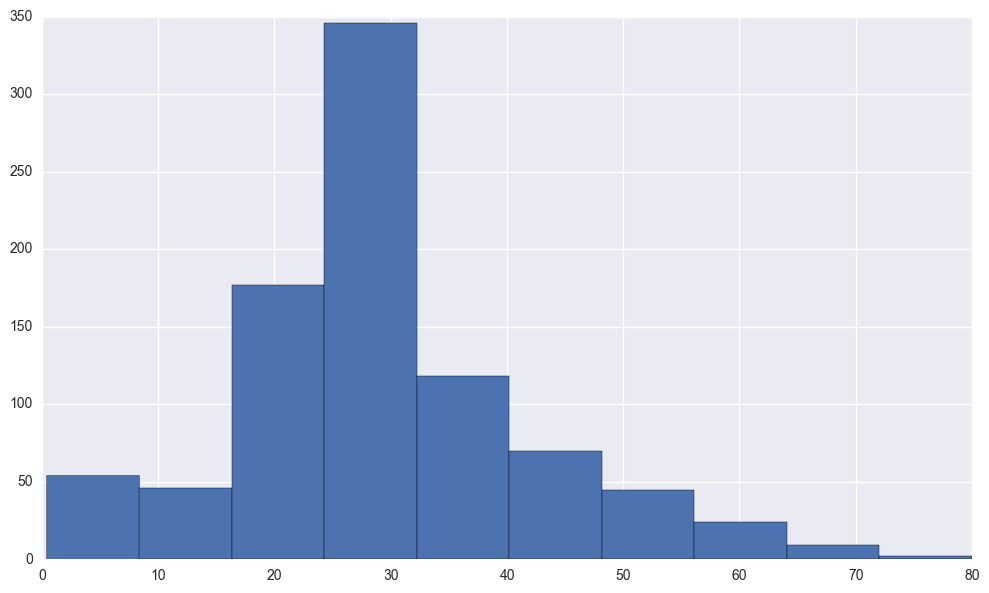

In [9]:
# plot age distribtuion on a histogram
figure = plt.figure(figsize=(12,7))
data.Age.hist()

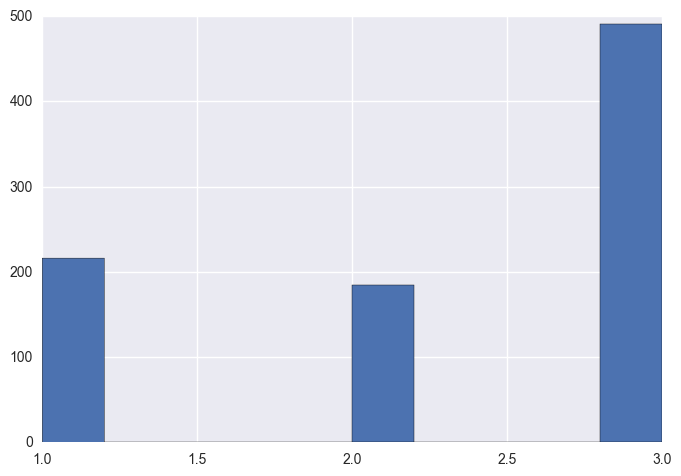

In [10]:
# passenger class histogram
data.Pclass.hist()

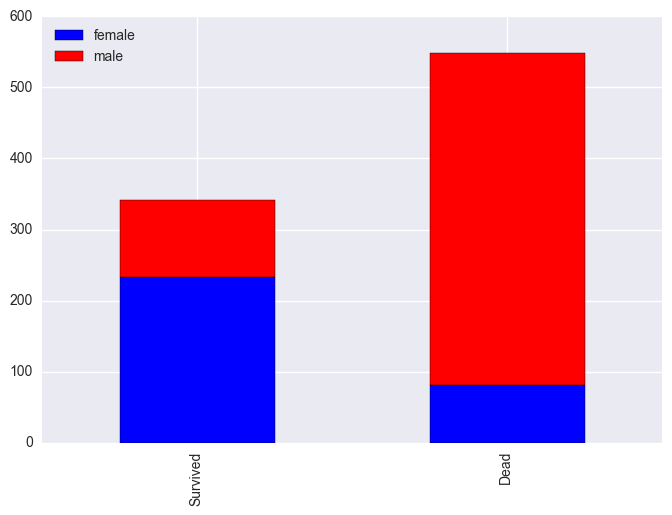

In [11]:
# correlate the survival with the Sex variable.
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True,color = ['b','r'])

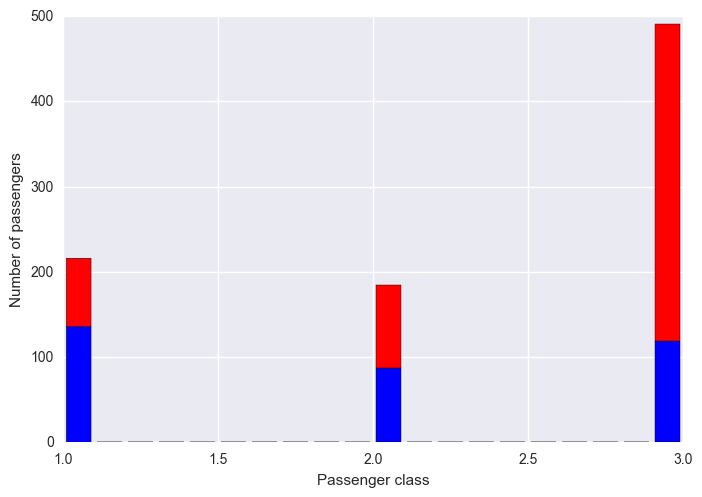

In [12]:
#correlate the survival with the Pclass variable. 
plt.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']], 
         stacked=True, color = ['b','r'],bins = 20,label = ['Survived','Dead'])
plt.xlabel('Passenger class')
plt.ylabel('Number of passengers')

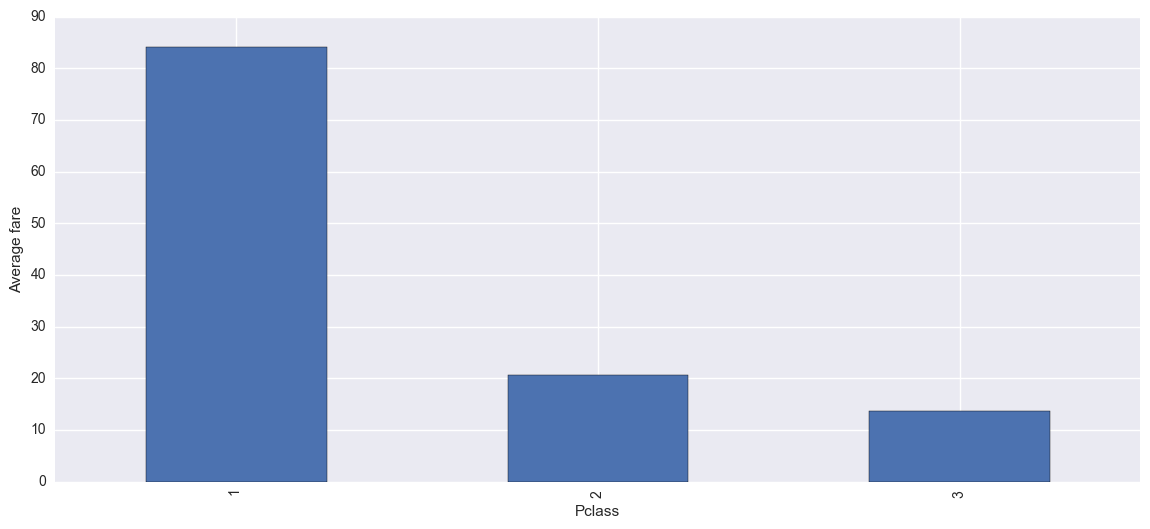

In [13]:
# Fare group by passenger class
plt.ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(14,6))

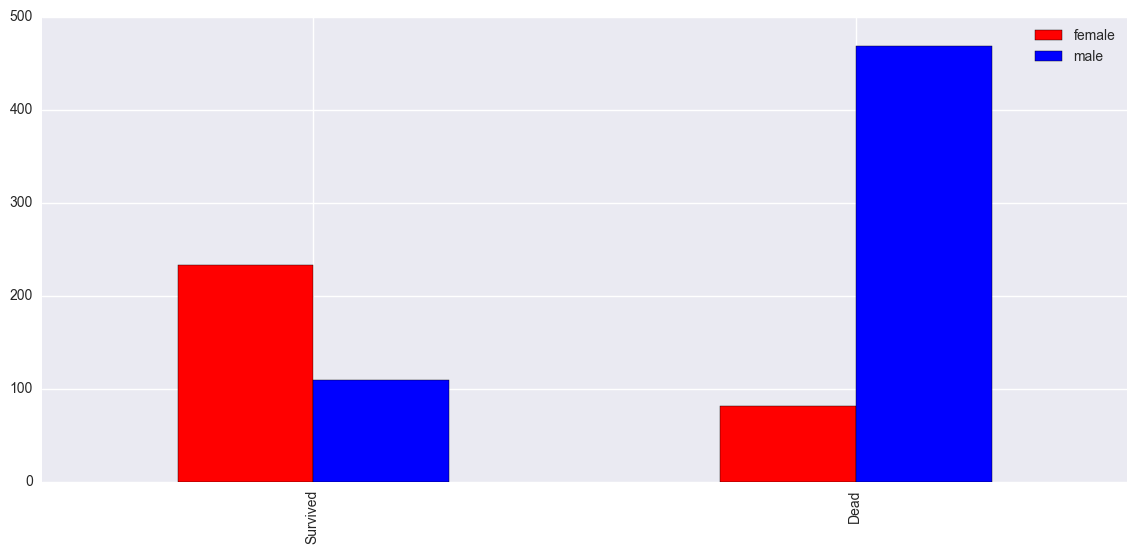

In [14]:
# create a dataframe for gender survival
gen_df = pd.DataFrame([survived_sex, dead_sex],['Survived', 'Dead'])

# plot survived based genders
gen_df.plot(kind='bar', figsize=(14,6), color = ['r', 'b'])

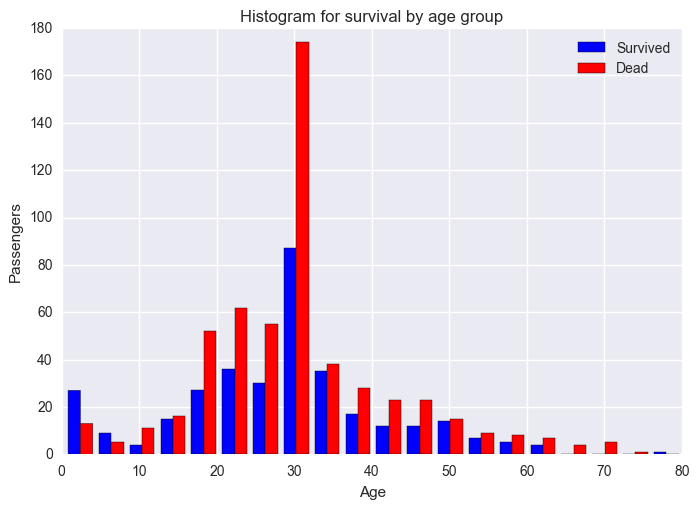

In [15]:
# histogram plot for survival by age
plt.hist([data[data.Survived == 1].Age,data[data.Survived == 0].Age], 
         bins = 20, label = ['Survived', 'Dead'], color= ['b','r'])
plt.title("Histogram for survival by age group")
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend()

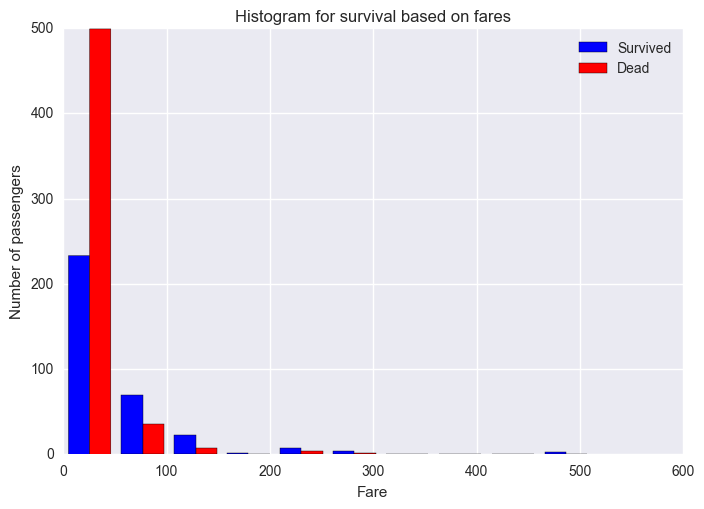

In [16]:
# histogram plot for survival based on fares
plt.hist([data[data.Survived == 1].Fare, data[data.Survived == 0].Fare],
         color = ['b','r'], label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.title("Histogram for survival based on fares")

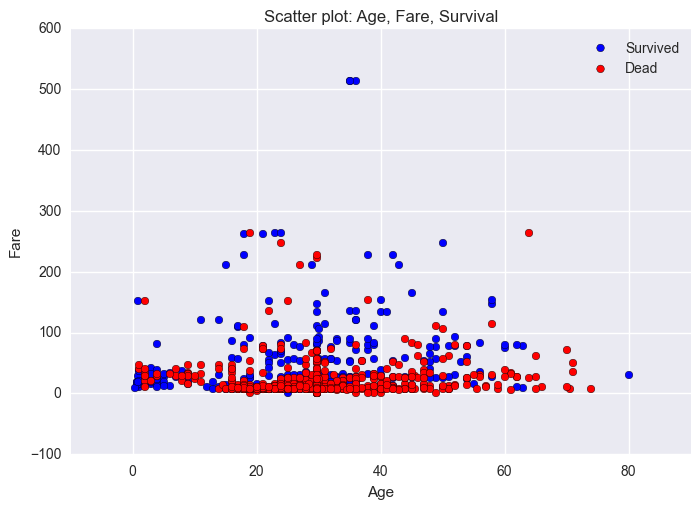

In [17]:
# combine the age, the fare and the survival on a scatter plot
plt.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'], c='b', s=30)
plt.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'], c='r', s=30)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(('Survived','Dead'),scatterpoints=1,loc='upper right')
plt. title("Scatter plot: Age, Fare, Survival")

## II - Feature Engineering

In [18]:
# unique values from age field in training set
data.Age.unique()

array([ 22.        ,  38.        ,  26.        ,  35.        ,
        29.69911765,  54.        ,   2.        ,  27.        ,
        14.        ,   4.        ,  58.        ,  20.        ,
        39.        ,  55.        ,  31.        ,  34.        ,
        15.        ,  28.        ,   8.        ,  19.        ,
        40.        ,  66.        ,  42.        ,  21.        ,
        18.        ,   3.        ,   7.        ,  49.        ,
        29.        ,  65.        ,  28.5       ,   5.        ,
        11.        ,  45.        ,  17.        ,  32.        ,
        16.        ,  25.        ,   0.83      ,  30.        ,
        33.        ,  23.        ,  24.        ,  46.        ,
        59.        ,  71.        ,  37.        ,  47.        ,
        14.5       ,  70.5       ,  32.5       ,  12.        ,
         9.        ,  36.5       ,  51.        ,  55.5       ,
        40.5       ,  44.        ,   1.        ,  61.        ,
        56.        ,  50.        ,  36.        ,  45.5 

In [19]:
#unique values from age field in testing set
test_data.Age.unique()

array([ 34.5       ,  47.        ,  62.        ,  27.        ,
        22.        ,  14.        ,  30.        ,  26.        ,
        18.        ,  21.        ,  30.27259036,  46.        ,
        23.        ,  63.        ,  24.        ,  35.        ,
        45.        ,  55.        ,   9.        ,  48.        ,
        50.        ,  22.5       ,  41.        ,  33.        ,
        18.5       ,  25.        ,  39.        ,  60.        ,
        36.        ,  20.        ,  28.        ,  10.        ,
        17.        ,  32.        ,  13.        ,  31.        ,
        29.        ,  28.5       ,  32.5       ,   6.        ,
        67.        ,  49.        ,   2.        ,  76.        ,
        43.        ,  16.        ,   1.        ,  12.        ,
        42.        ,  53.        ,  26.5       ,  40.        ,
        61.        ,  60.5       ,   7.        ,  15.        ,
        54.        ,  64.        ,  37.        ,  34.        ,
        11.5       ,   8.        ,   0.33      ,  38.  

In [20]:
# age median group by sex and passenger class on training set
data.groupby(['Sex','Pclass']).median()

PassengerId  Survived        Age  SibSp  Parch      Fare
Sex    Pclass                                                          
female 1             447.0       1.0  32.500000      0      0  82.66455
       2             439.5       1.0  28.500000      0      0  22.00000
       3             376.0       0.5  28.000000      0      0  12.47500
male   1             480.5       0.0  36.000000      0      0  41.26250
       2             416.5       0.0  29.699118      0      0  13.00000
       3             466.0       0.0  29.699118      0      0   7.92500

In [21]:
data['Sex'].value_counts()

male      577
female    314
dtype: int64

In [22]:
#maps the string (male/female) to int(0 / 1 ).
data.Sex = data.Sex.map({'male':0, 'female':1}).astype(int)
test_data.Sex =test_data.Sex.map({'male':0, 'female':1}).astype(int)

In [23]:
# training data description
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
data.Fare.unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [25]:
data.Pclass.unique()

array([3, 1, 2])

In [26]:
# fill na with 'S" (most freq) in Embarked
data.Embarked=data.Embarked.fillna('S')
test_data.Embarked=test_data.Embarked.fillna('S')

In [27]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [29]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

## III - Modeling and Predicting

In [30]:
#traing data
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


In [31]:
#testing data
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.00000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.00000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.00000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.00000,2,0,A/4 48871,24.1500,NaN,S


In [32]:
# maps the string (S,C and Q) to int(2 ,0 and 1 ).
Ports = list(enumerate(np.unique(data['Embarked'])))    
Ports_dict = { name : i for i, name in Ports }              
data.Embarked = data.Embarked.map( lambda x: Ports_dict[x]).astype(int) 

In [33]:
# drop name, ticket, cabin, embarked for now
df = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,2
1,2,1,1,1,38.000000,1,0,71.2833,0
2,3,1,3,1,26.000000,0,0,7.9250,2
3,4,1,1,1,35.000000,1,0,53.1000,2
4,5,0,3,0,35.000000,0,0,8.0500,2
5,6,0,3,0,29.699118,0,0,8.4583,1
6,7,0,1,0,54.000000,0,0,51.8625,2
7,8,0,3,0,2.000000,3,1,21.0750,2
8,9,1,3,1,27.000000,0,2,11.1333,2
9,10,1,2,1,14.000000,1,0,30.0708,0


In [34]:
train_data = df.drop(['Survived'], axis = 1).values
survived = df['Survived'].values

In [35]:
# apply SVM model to the training data
model = SVC(kernel='linear')
model = model.fit(train_data, survived)
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
# get the score for the model
score = model.score(train_data,survived)
score

0.79573512906846244

### Processing test data for making predictions

In [38]:
# maps the string (S,C and Q) to int(2 ,0 and 1 ).
test_data["Embarked"]=test_data.Embarked.fillna('S')

PortsTest = list(enumerate(np.unique(test_data['Embarked'])))    
PortsTest_dict = { name : i for i, name in PortsTest }              
test_data.Embarked = test_data.Embarked.map( lambda x: PortsTest_dict[x]).astype(int) 

In [41]:
df_test = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.50000,0,0,7.8292,1
1,893,3,1,47.00000,1,0,7.0000,2
2,894,2,0,62.00000,0,0,9.6875,1
3,895,3,0,27.00000,0,0,8.6625,2
4,896,3,1,22.00000,1,1,12.2875,2
5,897,3,0,14.00000,0,0,9.2250,2
6,898,3,1,30.00000,0,0,7.6292,1
7,899,2,0,26.00000,1,1,29.0000,2
8,900,3,1,18.00000,0,0,7.2292,0
9,901,3,0,21.00000,2,0,24.1500,2


In [63]:
df_test['Pclass'].isnull().values.any()

False

In [64]:
df_test['Sex'].isnull().values.any()

False

In [65]:
df_test['Age'].isnull().values.any()

False

In [66]:
df_test['SibSp'].isnull().values.any()

False

In [70]:
df_test['PassengerId'].isnull().values.any()

False

In [71]:
df_test['Parch'].isnull().values.any()

False

In [72]:
df_test['Fare'].isnull().values.any()

True

In [73]:
df_test['Embarked'].isnull().values.any()

False

In [74]:
df_test.Fare.fillna(test_data.Fare.mean(), inplace=True)

In [81]:
#making predictions
result = model.predict(df_test.values)

In [82]:
# print prediction result
output = pd.DataFrame(columns=['PassengerId', 'Survived'])
output['PassengerId'] = df_test.PassengerId
output['Survived'] = result.astype(int)
output.to_csv('SVM.csv', index=False)
print(output)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
3